In [27]:
# Denetimsiz Öğrenme => y olmaz yalnızca x kullanırız 

In [2]:
from sklearn.datasets import make_blobs

In [13]:
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42) # make_blobs => Etiketsiz rastgele veri oluşturur,X ve y olarak, 4lü gruplara ayırır

In [11]:
import matplotlib.pyplot as plt

In [ ]:
# X[:,0] -> : Tüm satırları al -> [0] 0. sütunu al.

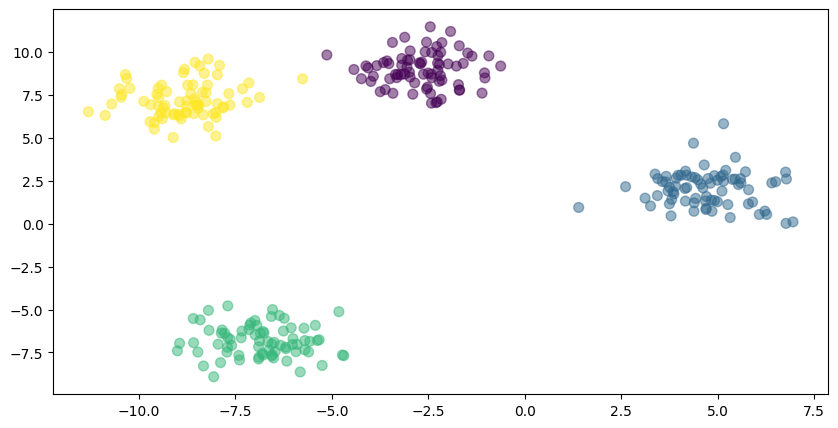

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], c=y_true, s=50, alpha=0.5)

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [21]:
X = df[ ["Annual Income (k$)", "Spending Score (1-100)"] ].values # df yi arraya çevir

In [24]:
# K-Means Algoritması => veri kümesini n adet kümeye (cluster) ayırmak ve her kümeye ait bir merkez nokta belirleyerek verileri bu merkezlere göre gruplamaktır.

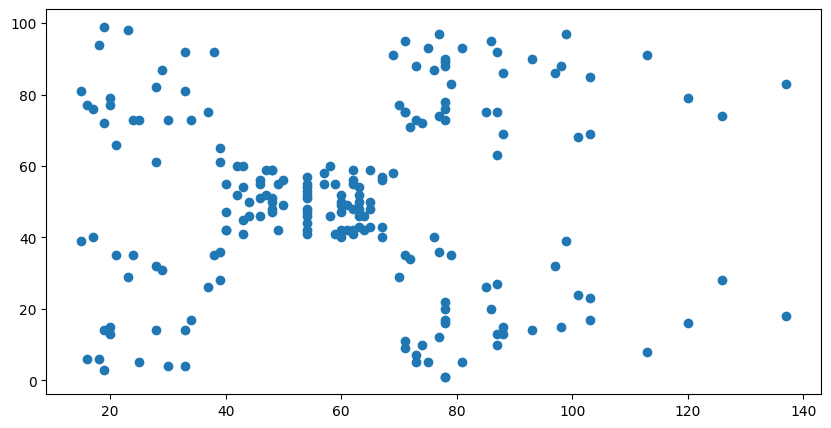

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1])

In [25]:
from sklearn.cluster import KMeans

In [30]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [31]:
model.cluster_centers_ # Belirlediği merkez noktaları

array([[48.16831683, 43.3960396 ],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [87.        , 18.63157895]])

In [32]:
y = model.predict(X)

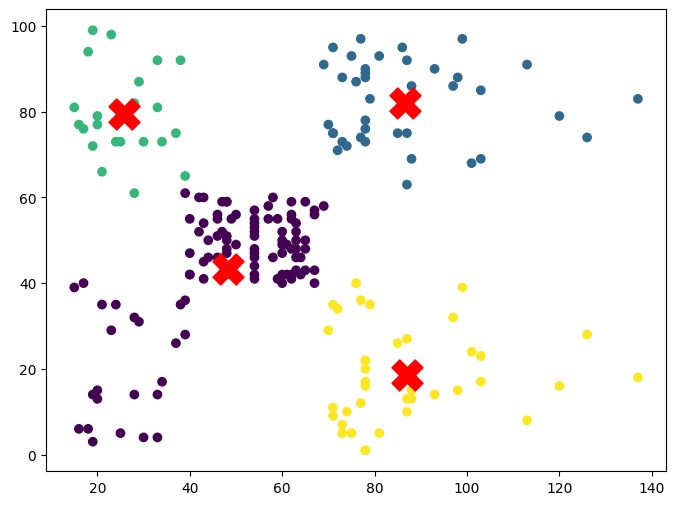

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="red", s=500, marker="X")
plt.show()

In [37]:
# Dirsek (Elbow) Method

In [38]:
# inertia => parametre - her noktanın kendi merkezine uzaklığının karelerinin toplamı.
model.inertia_

73880.64496247197

In [41]:
def elbow_methow():
    inertias = []
    for k in range(2,11):
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X)
        inertias.append(model.inertia_)
    plt.figure(figsize=(8,6))
    plt.plot(range(2,11), inertias)

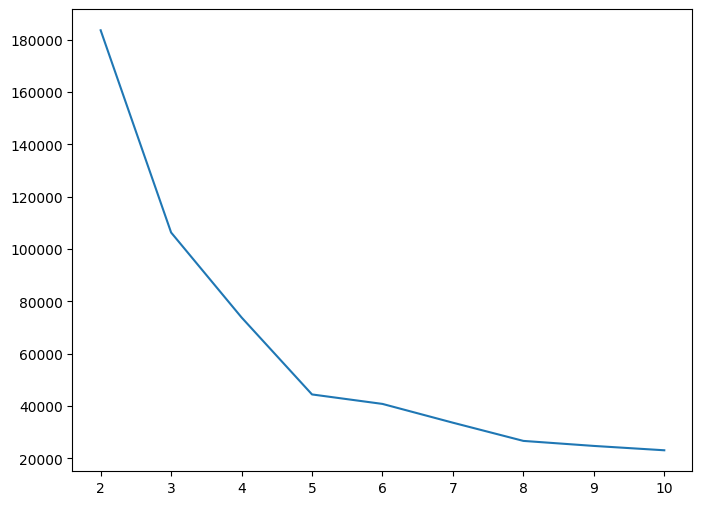

In [48]:
elbow_methow()
# dirsek methoduna göre en iyi n_clusters = 5

In [44]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [45]:
y = model.predict(X)

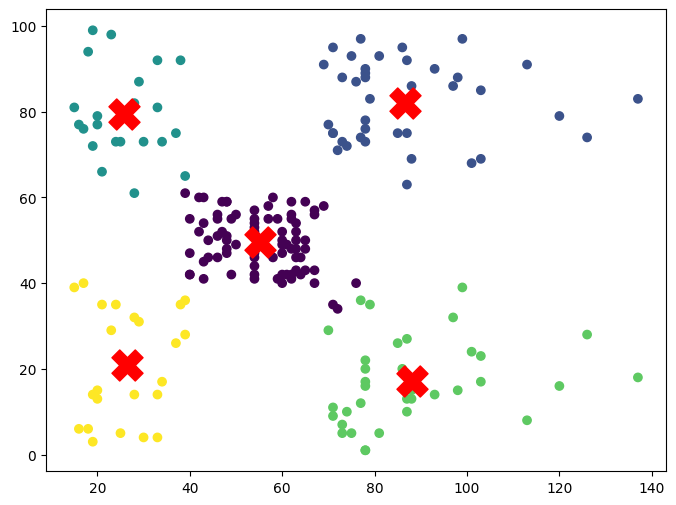

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="red", s=500, marker="X")
plt.show()

In [47]:
model.inertia_

44448.45544793371

In [55]:
# Silhouette Method -> Kendi merkezime yakınlık? Diğer merkezlere uzaklık?

In [50]:
from sklearn.metrics import silhouette_score

In [53]:
def silh_method():
    scores = []
    for k in range(2,11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        y = kmeans.fit_predict(X)
        scores.append(silhouette_score(X,y))
    plt.figure(figsize=(8,6))
    plt.plot(range(2,11), scores)
    plt.grid(True)
    plt.show()

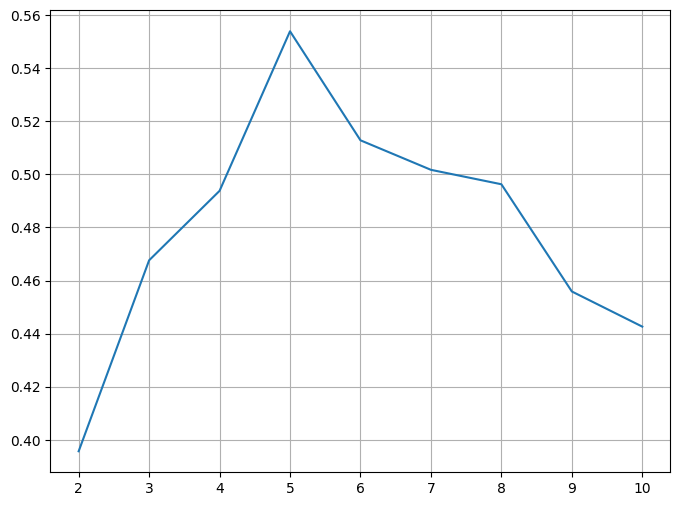

In [54]:
silh_method()

In [56]:
# 1.Ödev => Davies Bouldin method Araştırıp bu dosyada uygula
# 2.Ödev => Scaling(Özellik Ölçekleme) nedir? nasıl yapılır? Araştırılıp markdown dosyası oluştur
# DBSCAN -> Algoritması sonraki ders işlicez